# PGA tour winner Classification Machine Learning Project

As an avid golf fan and asipring data scientist, I've always been intrigued by what makes the professionals as good as they are. There are a number of statistics that are measured and recorded on the pgatour.com website and I have gone ahead and scraped some statistics from that website using python web scraping libraries. The web scraper can be seen in the PGAtour.com Web Scraper notebook located in this repository.

The purpose of this notebook is to find a good classifier to predict whether a PGA tour player won a pga tour event for the season in question. The dataset contains pga tour player data from 2010-2017.

# <a id='TOC'>Table of Contents</a>
<ol>
<li><a href='#section 1'>Understanding the Problem and the Data</a></li>
<li><a href='#section_2'>Data cleaning and formatting</a></li>
<li><a href='#section_3'>Exploratory Data Analysis</a></li>
<li><a href='#section_4'>Baseline Model</a></li>
<li><a href='#section_5'>Improved Model</a></li>
<li><a href='#section_5'>Conclusion</a></li>



</ol>

# 1. <a id='section_1'>Understanding the Problem and the Data</a>
<a href='#TOC'>Back to table of Contents</a>

The purpose of this notebook is to use yearly pga tour player statistics to determine whether or not a player won a tournament in the year in question. This is a standard supervised classification problem.

<ul>
<li> Supervised - The labels are included in the training data. Goal is to train a model to predict labels in test dataset from features.</li>
<li> Classification - The labels are included in the training data. Goal is to train a model to predict labels in test dataset from features.</li>

### Data

The data was scraped from the pgatour.com website. There is one table and it contains 11 columns.

### Data Dictionary
<ul>
<li>NAME - Name of the golfer.</li>
<li>ROUNDS - Number of PGA tour rounds played in that year by that particular player.</li>
<li>SCORING - Average score per round played for that year. According to the PGAtour.com website, this metric is an adjusted scoring average, which takes into account the strength of the field for each event.</li>
<li>DRIVE_DISTANCE - The average number of yards per measured drive. Drives are measured on two holes per round and holes are selected that face in opposite directions to counteract the effect of wind. Drives are measured to the point at which they come to rest regardless of whether they are in the fairway or not.</li>
<li>FWY_% - The percentage of time a tee shot comes to rest in the fairway (regardless of club).</li>
<li>GIR_% - The percent of time a player was able to hit the green in regulation. A green is considered hit in regulation if any portion of the ball is touching the putting surface after the GIR stroke has been taken. The GIR stroke is determined by subtractin 2 from par on a hole (1st stroke on a par 3, 2nd on a par 4, 3rd on a par 5).</li>
<li>SG_P (Strokes gained putting) - The number of putts a player takes from a specific distance is measures against a statistical baseline to determine the player's stroked gained or lost on a hole. The sum of the values for all holes played in a round minus the field average stroked gained/lost for the round is the player's strokes gained/lost for that round. The sum of strokes gained for each round are then divided by total rounds played.</li>
<li>SG_TTG (Strokes gained tee to green) - The per round average of the number of strokes the player was better or worse than the field average on the same course & event minus the player's strokes gained putting value.</li>
<li>SG_T (Strokes Gained Total) - The per round average of the number of strokes the player was better or worse than the field average on the same course & event.</li>
<li>POINTS - The cumulative points the player has earned in the FedEx Cup points race for the year played.</li>
<li>TOP_10 - Number of top 10 finishes the player earned for the year played.</li>
<li>1ST - Number of wins the player earned for the year played.</li>
<li>Year - Year of PGA tour season</li>
<li>MONEY - PGA tour earnings from the season specified.</li>
<li>COUNTRY - Home country for player.</li>

The strokes gained statistics are somewhat complex in how they are calculated but have drastically changed how players assess their own performance. For more information on the strokes gained statistic I would recommend reading this article https://www.golfdigest.com/story/do-the-pga-tour-strokes-gained-statistics-have-a-sample-size-problem-shane-ryan.






# 2. <a id='section_2'>Data Cleaning and Formatting</a>
<a href='#TOC'>Back to table of Contents</a>

### Imports
Will be using numpy, pandas, matplotlib, seaborn and sklearn to complete this project. I will import the sklearn modules as needed throughout the project.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading the data
The data for this project is contained in a csv file named "pgatour_cleaned.csv" and can be found in this repository.

In [2]:
#Load data
df = pd.read_csv('pgatour_cleaned.csv', encoding="cp1252", index_col = 0)

### Inspecting the data

In [3]:
df.head()

,NAME,ROUNDS,SCORING,DRIVE_DISTANCE,FWY_%,GIR_%,SG_P,SG_TTG,SG_T,POINTS,TOP 10,1ST,Year,MONEY,COUNTRY
0,Aaron Baddeley,83,70.088,291.9,60.00,60.35,0.629,0.435,1.064,17703,7,1,2007,3441119,AUS
1,Adam Scott,69,70.008,300.9,59.17,65.44,0.129,1.105,1.234,15630,6,1,2007,3413185,AUS
2,Alex Cejka,80,70.437,288.9,68.08,69.44,-0.479,1.207,0.728,2400,4,0,2007,868303,GER
3,Anders Hansen,55,70.856,280.7,66.95,62.85,-0.176,0.087,-0.089,1989,0,0,2007,461216,DEN
4,Andrew Buckle,77,71.443,294.7,58.14,62.52,0.161,-0.426,-0.265,1875,1,0,2007,513630,AUS


In [4]:
print(df.shape)

(2044, 15)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2044 entries, 0 to 2043
Data columns (total 15 columns):
NAME              2044 non-null object
ROUNDS            2044 non-null int64
SCORING           2044 non-null float64
DRIVE_DISTANCE    2044 non-null float64
FWY_%             2044 non-null float64
GIR_%             2044 non-null float64
SG_P              2044 non-null float64
SG_TTG            2044 non-null float64
SG_T              2044 non-null float64
POINTS            2044 non-null int64
TOP 10            2044 non-null int64
1ST               2044 non-null int64
Year              2044 non-null int64
MONEY             2044 non-null int64
COUNTRY           2044 non-null object
dtypes: float64(7), int64(6), object(2)
memory usage: 255.5+ KB


In [6]:
df.describe()

,ROUNDS,SCORING,DRIVE_DISTANCE,FWY_%,GIR_%,SG_P,SG_TTG,SG_T,POINTS,TOP 10,1ST,Year,MONEY
count,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2.044000e+03
mean,79.355186,70.912630,289.540068,62.036404,65.412480,0.022556,0.129178,0.151788,1790.963796,2.675147,0.234344,2011.949119,1.419303e+06
std,14.604295,0.681575,8.710074,5.209013,2.650798,0.351150,0.621524,0.675791,3833.522276,2.411051,0.593136,3.185158,1.325270e+06
min,45.000000,67.794000,259.000000,41.860000,54.230000,-1.475000,-3.340000,-3.209000,6.000000,0.000000,0.000000,2007.000000,4.546000e+04
25%,69.000000,70.490500,283.600000,58.510000,63.640000,-0.194000,-0.259500,-0.262500,360.000000,1.000000,0.000000,2009.000000,5.564188e+05
50%,80.000000,70.899000,289.300000,62.040000,65.560000,0.036000,0.140500,0.157500,659.000000,2.000000,0.000000,2012.000000,1.016720e+06
75%,90.000000,71.338750,295.200000,65.605000,67.122500,0.261000,0.528000,0.564250,1272.000000,4.000000,0.000000,2015.000000,1.809302e+06
max,124.000000,74.262000,318.400000,80.420000,73.520000,1.130000,2.380000,3.189000,53607.000000,15.000000,7.000000,2017.000000,1.203046e+07


In [7]:
df.describe(include=['O'])

,NAME,COUNTRY
count,2044,2044
unique,478,29
top,Rory Sabbatini,USA
freq,11,1405


In [8]:
#Create 300+ and winner column
df['300+'] = df['DRIVE_DISTANCE'].apply(lambda x: 1 if x>=300 else 0)
df['Winner'] = df['1ST'].apply(lambda x: 1 if int(x) >= 1 else 0)

In the EDA notebook also in this repository I discovered that the FED EX cup points system was different in 2007 and 2008 than for the rest of the years in this dataset. Because of this I'm going to create a dataframe that encompasses only the years 2009-2017 so I can use that feature in the machine learning model later.

In [9]:
#Only use data from 2009 onward
df2 = df[(df['Year'] != 2007) & (df['Year'] != 2008)]

In [10]:
df2.head()

,NAME,ROUNDS,SCORING,DRIVE_DISTANCE,FWY_%,GIR_%,SG_P,SG_TTG,SG_T,POINTS,TOP 10,1ST,Year,MONEY,COUNTRY,300+,Winner
389,Aaron Baddeley,66,71.153,287.8,56.48,59.57,0.604,-0.755,-0.151,431,2,0,2009,837065,AUS,0,0
390,Adam Scott,53,71.720,294.9,58.77,62.82,-0.881,0.220,-0.660,432,1,0,2009,783138,AUS,0,0
391,Alex Cejka,82,70.980,281.2,69.80,66.52,-0.322,0.555,0.233,416,3,0,2009,953664,GER,0,0
392,Andres Romero,58,71.462,298.5,51.62,64.91,-0.044,-0.247,-0.291,329,2,0,2009,789305,ARG,0,0
393,Anthony Kim,76,70.507,299.0,53.65,62.69,0.245,0.235,0.479,1420,3,0,2009,1972155,USA,0,0


# 3. <a id='section_3'>Exploratory Data Analysis</a>
<a href='#TOC'>Back to table of Contents</a>


## Winner Class Imbalance

[Text(0,0.5,'% Of Data'), Text(0.5,1,'% of data broken down by winner class')]

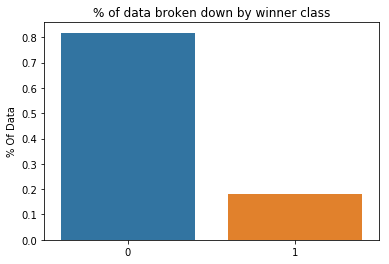

In [11]:
ci = sns.barplot(x=[0, 1], y=[(len(df2) - sum(df2['Winner'])) / len(df2), sum(df2['Winner']) / len(df2)])
ci.set(ylabel = "% Of Data", title="% of data broken down by winner class")

One important thing I will keep in mind when implementing my final machine learning algorithm is the imbalance in the Winner (1) vs non-winner class(0). Because there is this imbalance, it might be difficult to obtain a good quality of fit metric by using classic machine learning algorithms. Additionally, to truely understand the quality of the model, lookin at the Receiver Operating Characteristic Area Under the Curve (ROC AUC) might be a better measure of model quality than looking at a confusion matrix or overall accuracy measurement.

### Vizualizations

In [12]:
#Import plotting libs
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
df2.head()

,NAME,ROUNDS,SCORING,DRIVE_DISTANCE,FWY_%,GIR_%,SG_P,SG_TTG,SG_T,POINTS,TOP 10,1ST,Year,MONEY,COUNTRY,300+,Winner
389,Aaron Baddeley,66,71.153,287.8,56.48,59.57,0.604,-0.755,-0.151,431,2,0,2009,837065,AUS,0,0
390,Adam Scott,53,71.720,294.9,58.77,62.82,-0.881,0.220,-0.660,432,1,0,2009,783138,AUS,0,0
391,Alex Cejka,82,70.980,281.2,69.80,66.52,-0.322,0.555,0.233,416,3,0,2009,953664,GER,0,0
392,Andres Romero,58,71.462,298.5,51.62,64.91,-0.044,-0.247,-0.291,329,2,0,2009,789305,ARG,0,0
393,Anthony Kim,76,70.507,299.0,53.65,62.69,0.245,0.235,0.479,1420,3,0,2009,1972155,USA,0,0


## Distribution of all numeric Features

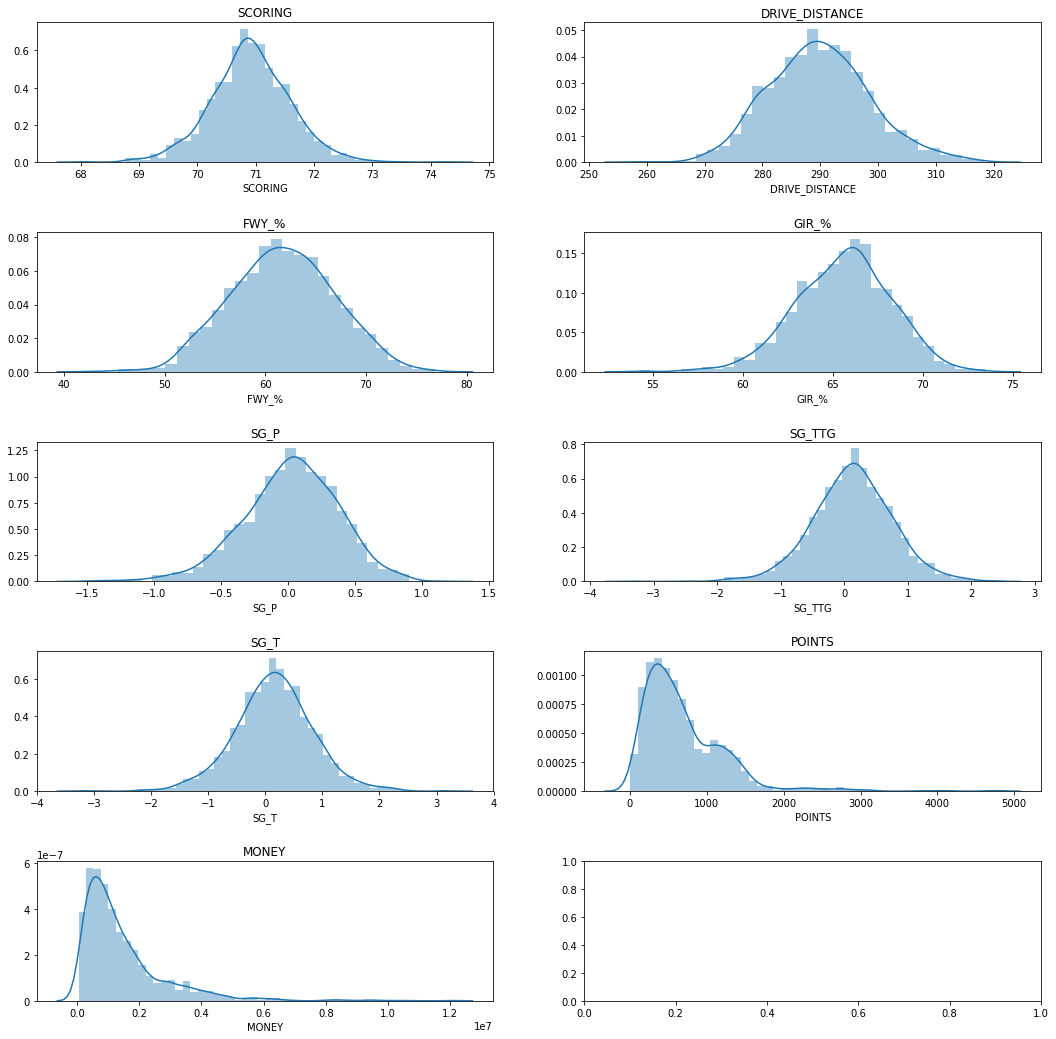

In [14]:
f, ax = plt.subplots(nrows = 5, ncols = 2, figsize=(18,18))
columns = ['SCORING', 'DRIVE_DISTANCE', 'FWY_%', 'GIR_%', 'SG_P',
       'SG_TTG', 'SG_T', 'POINTS', 'MONEY']
row = 0
col = 0
for i, column in enumerate(columns):
    g = sns.distplot(df2[column], ax=ax[row][col])
    g.set(title =  column)
    col += 1
    if col == 2:
        col = 0
        row += 1
        
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=.5)


Based on these distributions we can see that all of the features appear to be approximately normally distributed except for the POINTS and MONEY column which are skewed right. It makes sense for these columns to be skewed because a majority of the players on the PGA tour aren't making above 3 million dollars (75th percentile is 1.8 million). This means a majority of the players will earn below 1.8, with only a select few earning above 3-4 million dollars. This same logic can be applied to the POINTS column as well.

### Scoring Average Over Time

Text(0.5,1,'Scoring Averages Since 2010 on PGA Tour')

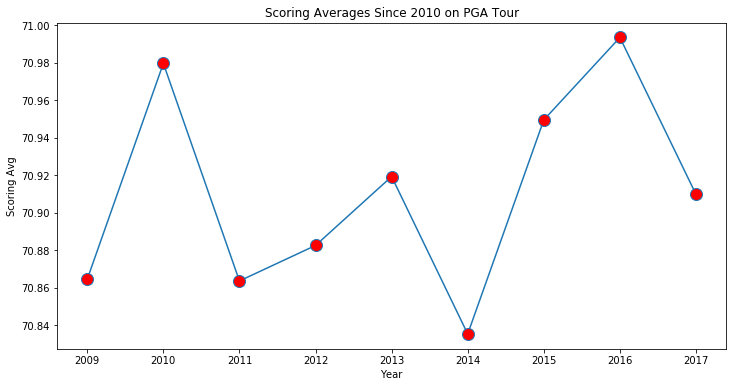

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(df2.groupby('Year').mean()['SCORING'], marker='o', markerfacecolor='red', markersize = 12)
plt.xlabel('Year')
plt.ylabel('Scoring Avg')
plt.title('Scoring Averages Since 2010 on PGA Tour')

Observations: Scoring Average for players on the PGA tour has not varied too significantly over the 8 year span represented by this dataset. The highest scoring averages comes in years 2010 and 2016 at about 71 strokes/round, and the lowest coming in 2014 with roughly 70.825 strokes per round.


### Scatterplot of AVG DRIVING DISTANCE. VS FWY %

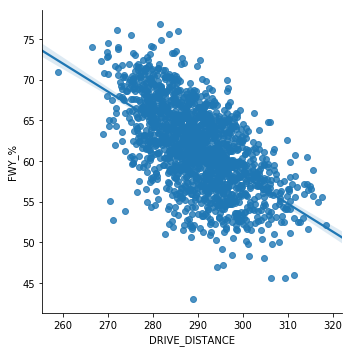

In [16]:
sns.lmplot(x='DRIVE_DISTANCE', y='FWY_%', data=df2)

Observations: AVG DRIVING DISTANCE is negatively correlated with FWY %. Being a golfer and a golf fan this makes sense because the guys who hit it farther are more likely to hit it offline than someone who doesn't hit it as far.

### FED EX Cup Points Over Time Separated by avg drivers over 300 yards and not over 300 yards

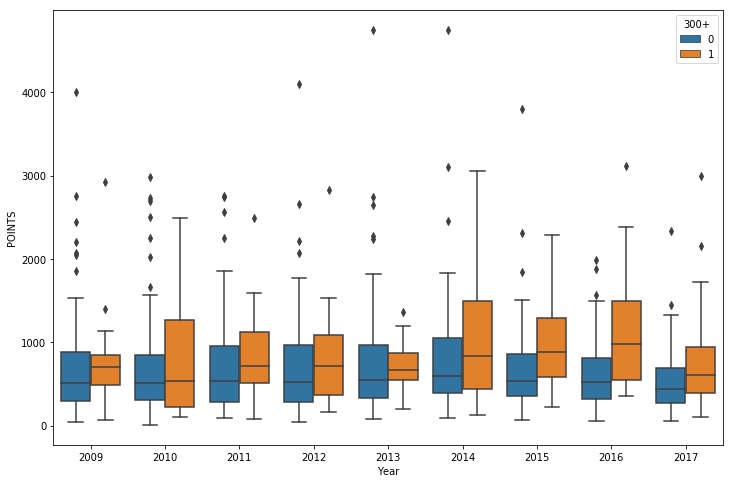

In [17]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Year', y='POINTS', hue='300+', data=df2)

Observations: With the exception of the 2013 season, individuals who drove the ball over 300 yards tended to gain more fex ex cup points on average.

### Average driving distance over time broken separated by winners and non winners

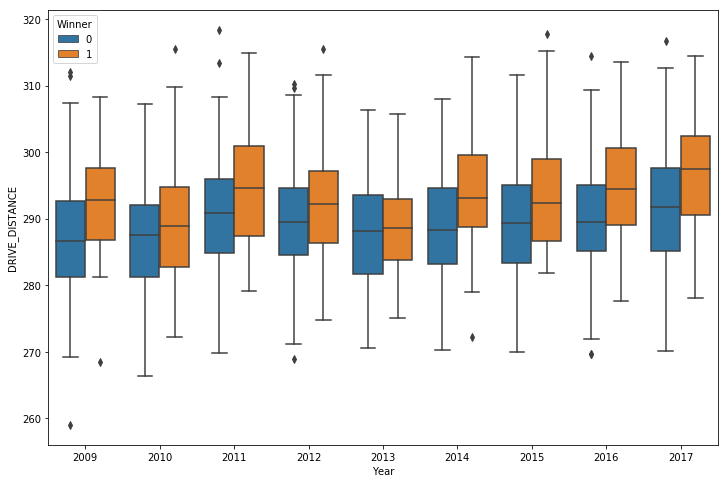

In [18]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Year', y='DRIVE_DISTANCE', hue='Winner', data=df2)

Observations: Tournament winners tend to drive the ball further than non-tournament winners

### Scoring Average Over time separated by 300+ drivers.

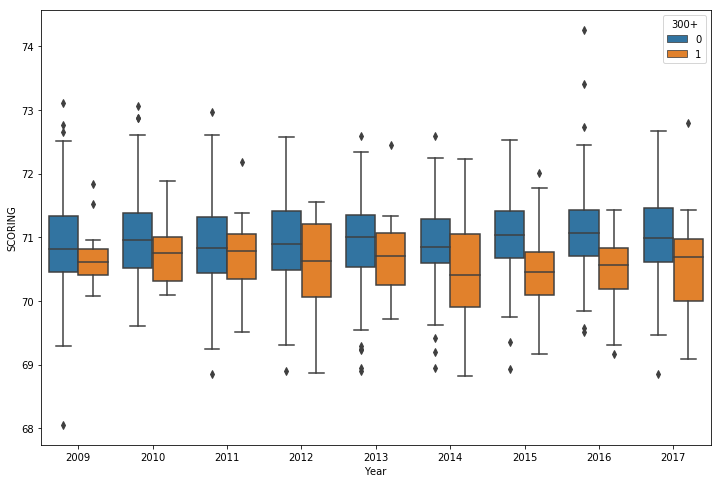

In [19]:
plt.figure(figsize=(12, 8))
sns.boxplot(x = 'Year', y = 'SCORING', hue='300+', data = df2)

Observations: Longer drivers tend to have a lower scoring average. I find it surprising that this appears to be the case for pretty muche every year since 2010.

### Fairway % over time separated by tournament and non-tournament winners

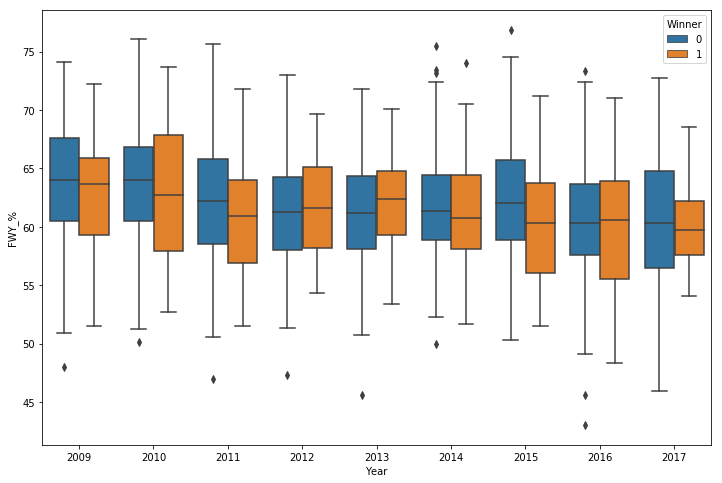

In [20]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Year', y='FWY_%', hue='Winner', data=df2)

Observations: There doesn't appear to be a trend with winning tournaments and Fairway %

### Number of individuals who drive the ball over 300 yards for each year in dataset

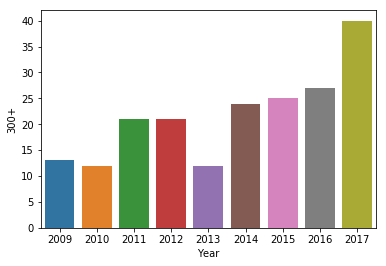

In [21]:
sns.barplot(x = 'Year', y = '300+', data = df2.groupby('Year').sum().reset_index())

Observations: Since 2010, the number of individuals who drive the ball over 300 yards on average has increased. What's amazing here is the number of guys who averaged it over 300 in 2016 compared to 2017 differs by a factor of nearly 1.5.

### Distribution of scoring average column

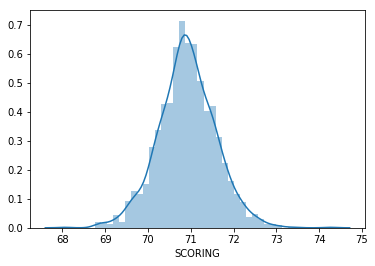

In [22]:
sns.distplot(df2['SCORING'])

Observations: Scored look approximately normally distributed, a few outliers on the higher end of the distribution. Scoring average for all golfers across all years is 70.9 with a standard deviation of 0.688.

### Barplot of top 10's vs Scoring Average.

[(68, 73),
 Text(0,0.5,'Scoring Average'),
 Text(0.5,1,"# of top 10's vs scoring average")]

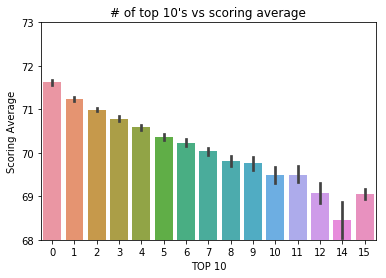

In [23]:
bp = sns.barplot(x="TOP 10",y='SCORING', data = df2)
bp.set(ylim=(68, 73), title="# of top 10's vs scoring average", ylabel="Scoring Average")

Observations: As the number of top 10's increase, scoring average tends to decrease.

### Barplot of Fedex cup points vs Number of top 10's

[Text(0,0.5,'Fedex Cup Points'),
 Text(0.5,1,"# of top 10's vs Fedex Cup Points")]

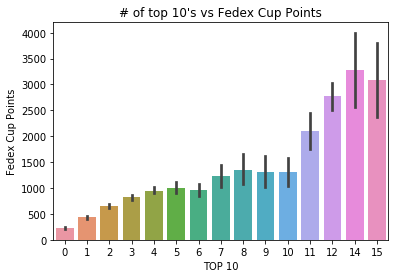

In [24]:
bp = sns.barplot(x="TOP 10",y='POINTS', data = df2)
bp.set(title="# of top 10's vs Fedex Cup Points", ylabel="Fedex Cup Points")

Observations: As the number of top 10's increase, Fedex cup points tend to increase. This makes sense intuitively because more fed ex cup points are awarded for top 10 finishes.

## Boxplots of all numeric columns based on winners and non-winners

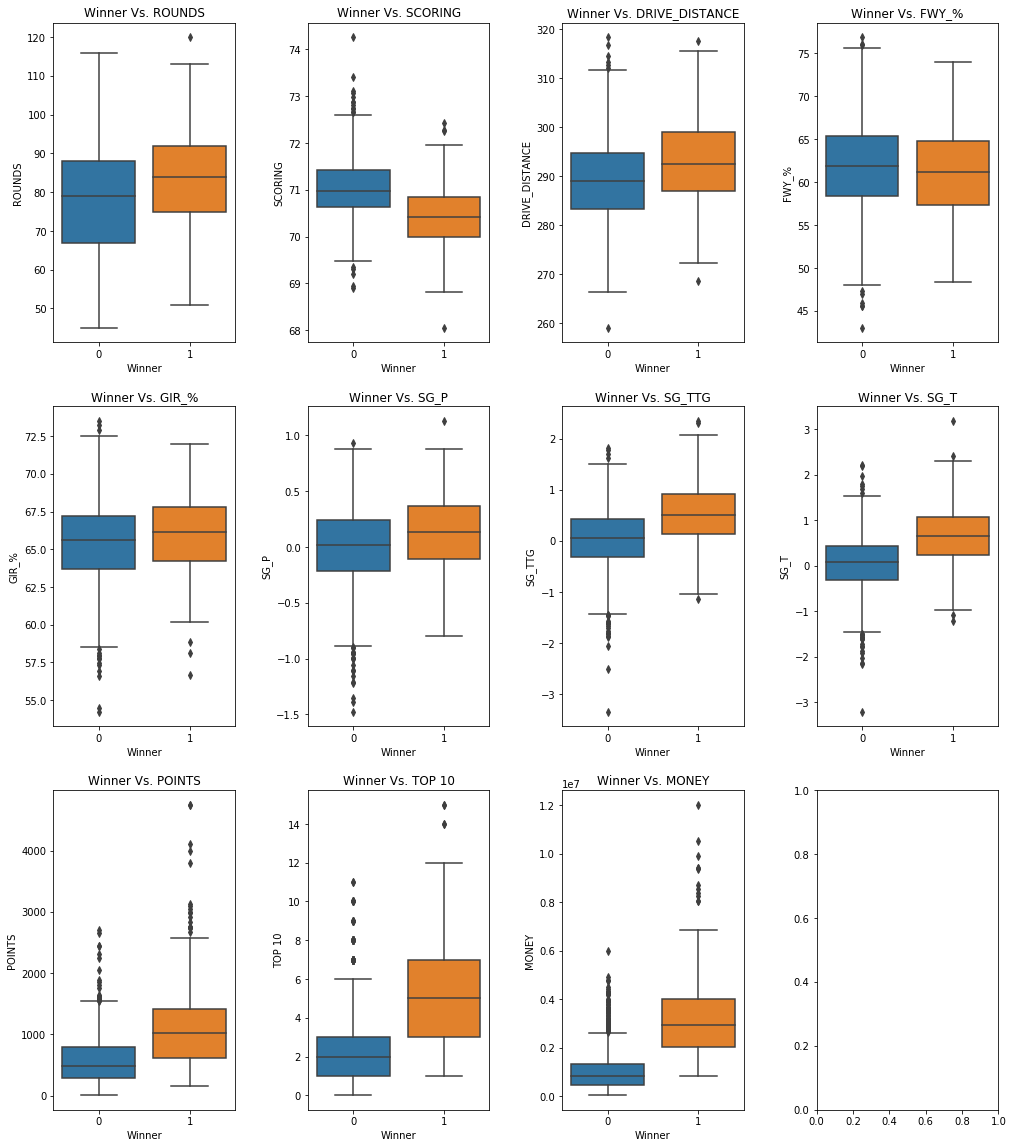

In [25]:
f, ax = plt.subplots(nrows = 3, ncols = 4, figsize=(15,20))
columns = ['ROUNDS', 'SCORING', 'DRIVE_DISTANCE', 'FWY_%', 'GIR_%', 'SG_P',
       'SG_TTG', 'SG_T', 'POINTS', 'TOP 10', 'MONEY']
row = 0
col = 0
for i, column in enumerate(columns):
    g = sns.boxplot(x='Winner', y=column, ax=ax[row][col], data=df2)
    g.set(title = "Winner Vs. " + column)
    col += 1
    if col == 4:
        col = 0
        row += 1
        
plt.subplots_adjust(left=None, bottom=None, right=1, top=None, wspace=.4, hspace=None)


# Correlations

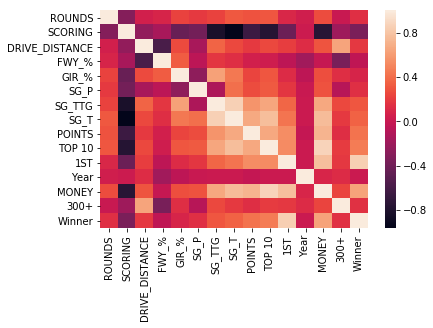

In [26]:
sns.heatmap(df2.corr())

In [27]:
df.corr()['Winner']

ROUNDS            0.109296
SCORING          -0.356711
DRIVE_DISTANCE    0.170272
FWY_%            -0.058688
GIR_%             0.046866
SG_P              0.142348
SG_TTG            0.299799
SG_T              0.349794
POINTS            0.214396
TOP 10            0.447341
1ST               0.839204
Year              0.012706
MONEY             0.629788
300+              0.137534
Winner            1.000000
Name: Winner, dtype: float64

### Feature Engineering

I will first remove the name, 1st and winner columns from df2 because the name column will not be needed in the machine learning model and the Winner column is the target variable. The Winner column was created from the 1st column so we'll remove this as well. Next, I'll create some domain features based on my knowledge of the game. Lastly, I'll create interaction terms between all features not associated with a country.

In [28]:
#Assign name and target to variables
names = df2['NAME']
target = df2['Winner']
#Drop columns
df2.drop(['NAME', '1ST', 'Winner'], axis=1, inplace=True)

#Get dummies for country variable.
df2 = pd.get_dummies(df2)


C:\Users\daron\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Create domain features

In [29]:
domain_feats = df2.copy()

In [30]:
#Create money per round features
domain_feats['MONEY_PER_ROUND'] = domain_feats['MONEY'] / domain_feats['ROUNDS']

In [31]:
#Create SG_P + SG_TTG metric
domain_feats['SG_SUM'] = domain_feats['SG_P'] + domain_feats['SG_TTG']

Create polynomial features

In [32]:
poly_features = df2.copy()

#Import polynomial feature module
from sklearn.preprocessing import PolynomialFeatures

#Create polynomial object with degree of 2
poly_transformer = PolynomialFeatures(degree = 2)

#Train the polynomial features on first 13 columns
poly_transformer.fit(poly_features.iloc[:, :13])

#Transform the features on first 13 columns
poly_features = poly_transformer.transform(poly_features.iloc[:,:13])

print('Polynomial Features Shape: ', poly_features.shape)

Polynomial Features Shape:  (1655, 105)


In [33]:
poly_features = pd.DataFrame(poly_features, columns = poly_transformer.get_feature_names(df2.columns))

In [34]:
poly_features = poly_features.iloc[:, 1:]
poly_features.head()

,ROUNDS,SCORING,DRIVE_DISTANCE,FWY_%,GIR_%,SG_P,SG_TTG,SG_T,POINTS,TOP 10,...,TOP 10^2,TOP 10 Year,TOP 10 MONEY,TOP 10 300+,Year^2,Year MONEY,Year 300+,MONEY^2,MONEY 300+,300+^2
0,66.0,71.153,287.8,56.48,59.57,0.604,-0.755,-0.151,431.0,2.0,...,4.0,4018.0,1674130.0,0.0,4036081.0,1.681664e+09,0.0,7.006778e+11,0.0,0.0
1,53.0,71.720,294.9,58.77,62.82,-0.881,0.220,-0.660,432.0,1.0,...,1.0,2009.0,783138.0,0.0,4036081.0,1.573324e+09,0.0,6.133051e+11,0.0,0.0
2,82.0,70.980,281.2,69.80,66.52,-0.322,0.555,0.233,416.0,3.0,...,9.0,6027.0,2860992.0,0.0,4036081.0,1.915911e+09,0.0,9.094750e+11,0.0,0.0
3,58.0,71.462,298.5,51.62,64.91,-0.044,-0.247,-0.291,329.0,2.0,...,4.0,4018.0,1578610.0,0.0,4036081.0,1.585714e+09,0.0,6.230024e+11,0.0,0.0
4,76.0,70.507,299.0,53.65,62.69,0.245,0.235,0.479,1420.0,3.0,...,9.0,6027.0,5916465.0,0.0,4036081.0,3.962059e+09,0.0,3.889395e+12,0.0,0.0


# 4. <a id='section_4'>Train, fit, and test machine learning model</a>
<a href='#TOC'>Back to table of Contents</a>

In order to predict winners from the 2017 season, I'm going to use a Random Forest Classification model because of it's ability to be trained on different parts of the same training set and as a result reducing the variance (overfitting) in the final model. The steps I will take to build this model are listed below.

For this project I'm going to use the Receiver Operating Characteristic Area Under the Curve (ROC AUC) as the primary measure of model quality. This is because as stated earlier this problem suffers from a class imbalance problem as the number of non-winners significantly outweighs winners. 81% of the data is made up of non-winners and 19% of the data is made up of winners. This means that I could create a model that predicts each player as a non-winner and get a prediction accuracy of 81%! The point of this project is to create a model that can distinguish PGA tour winners between non-winners and because of that the ROC AUC does a better job of measuring the model's ability to correctly classify a tournament winner correctly. for more information about the ROC AUC read [this link](https://en.wikipedia.org/wiki/Receiver_operating_characteristic#Area_under_the_curve)

I'm going to follow the following framework:
<ol>
<li>Import machine learning modules</li>
<li>Build a function to run random forest model and output results.</li>
<li>Run model on baseline, domain, and polynomial features</li>
<li>Assess results</li>
</ol>


### Import machine learning modules

In [35]:
from sklearn.model_selection import train_test_split #Train test splits
from sklearn.linear_model import LogisticRegression #Logistic regression
from sklearn.metrics import classification_report #Classification report metrics
from sklearn.metrics import confusion_matrix #Confusion matrix
from sklearn.ensemble import RandomForestClassifier #Random Forest Classifier
from sklearn.metrics import roc_curve, roc_auc_score

### Build function to run random forest model on

In [36]:
def rfc(X, y):
    
    #Split data into training and testing sets.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=40)
    
    #Initialize random forest classifier
    rfc = RandomForestClassifier(n_estimators=200)
    
    #Fit model to training data
    rfc.fit(X_train, y_train)
    
    #Print chart of feature importances
    feature_importance = pd.DataFrame({"Features" : list(X.columns), "Importance": rfc.feature_importances_})
    feature_importance.sort_values(by="Importance", ascending=False, inplace=True)
    plt.figure(figsize = (16, 8))
    sns.barplot(x = feature_importance['Features'][:10], y=feature_importance['Importance'])
    
    #Generate predictions
    rfc_pred = rfc.predict(X_test)
    
    #Create and print confusion matrix
    cf_dat = confusion_matrix(y_test, rfc_pred)
    confusion = pd.DataFrame(data = cf_dat)
    print(confusion)
    
    #Print classification report
    print(classification_report(y_test, rfc_pred))
    
    #Print ROC AUC Score
    print(roc_auc_score(y_test, rfc_pred))
    
    return roc_auc_score(y_test, rfc_pred)
    
    

### Run model for baseline, domain and polynomial features.

Baseline Features

     0   1
0  429  21
1   34  63
             precision    recall  f1-score   support

          0       0.93      0.95      0.94       450
          1       0.75      0.65      0.70        97

avg / total       0.90      0.90      0.90       547

0.801408934708


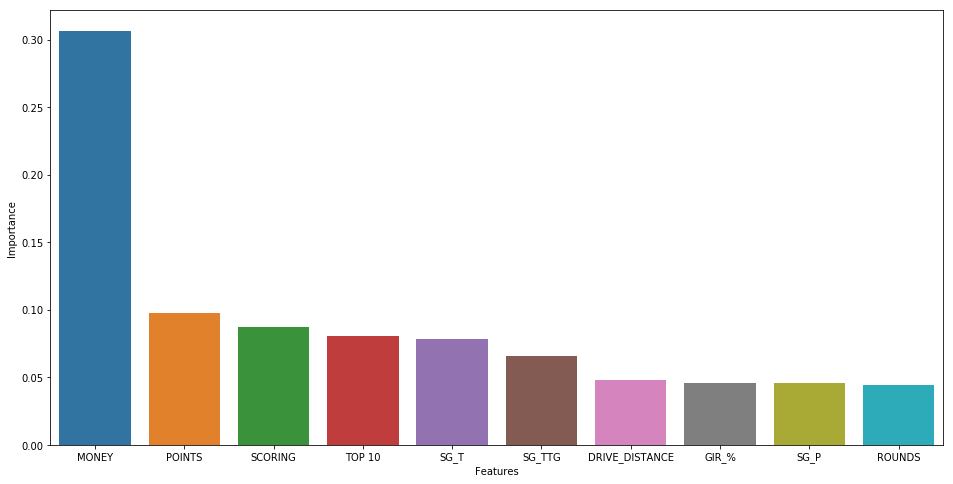

In [37]:
base_model = rfc(df2, target)

Domain Features

     0   1
0  428  22
1   24  73
             precision    recall  f1-score   support

          0       0.95      0.95      0.95       450
          1       0.77      0.75      0.76        97

avg / total       0.92      0.92      0.92       547

0.851844215349


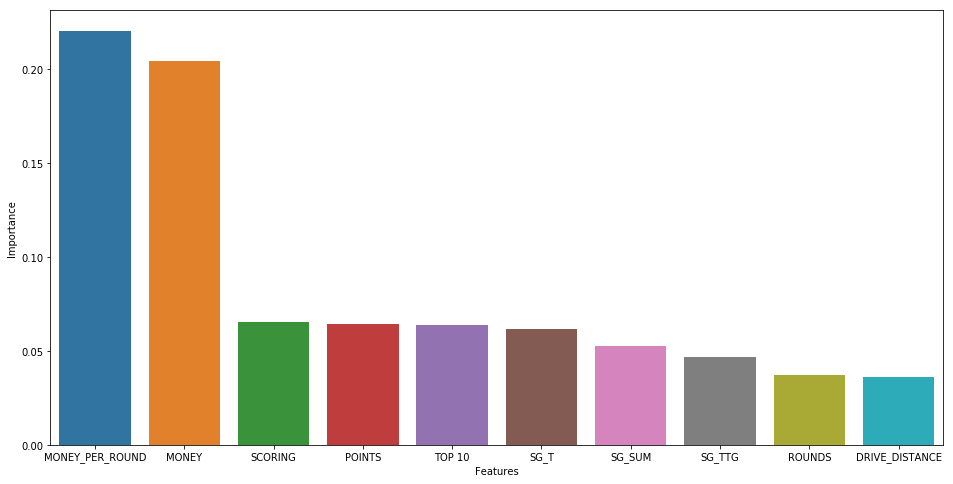

In [38]:
domain_model = rfc(domain_feats, target)

Polynomial Features

     0   1
0  426  24
1   22  75
             precision    recall  f1-score   support

          0       0.95      0.95      0.95       450
          1       0.76      0.77      0.77        97

avg / total       0.92      0.92      0.92       547

0.859931271478


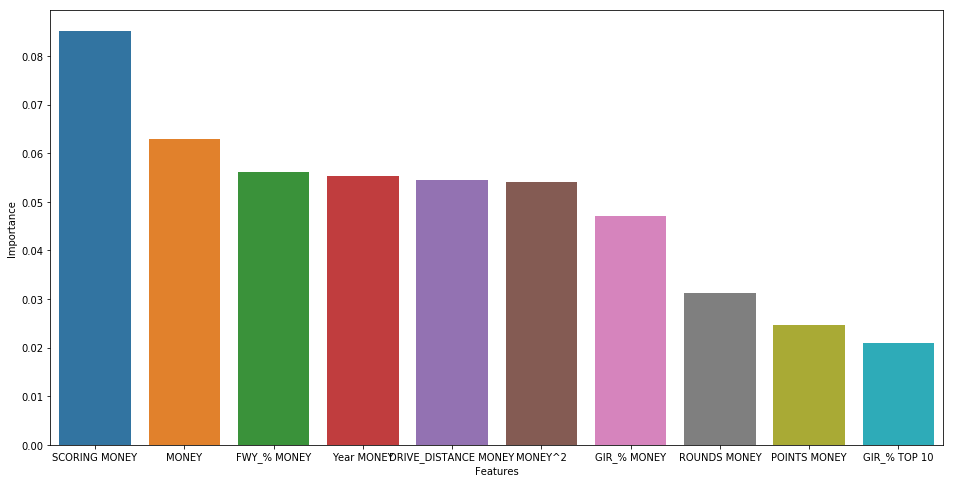

In [39]:
poly_model = rfc(poly_features, target)

### Assess Results

In [40]:
results = pd.DataFrame([base_model, domain_model, poly_model], index=['Baseline Model', 'Domain Feature Model', 'Polynomial Feature Model'], columns = ['ROC AUC Score'])

In [41]:
results

,ROC AUC Score
Baseline Model,0.801409
Domain Feature Model,0.851844
Polynomial Feature Model,0.859931


We can see that the ROC AUC score has increased by engineering domain and polynomial features.

# 5. <a id='section_5'>Conclusion</a>
<a href='#TOC'>Back to table of Contents</a>

### Notebook Observations
This notebook shows some interesting trends for winners on the PGA tour that I intend to explore further.
<ul>
<li>Winners on the PGA tour tend to hit the ball further than non-winners. Does hitting the ball further provide more value for PGA tour players than hitting it straighter?</li>
<li>The number of individuals that hit the ball over 300 yards jumped from 25 in 2016 to 41 in 2017. What is causing this huge spike in long drivers? Can we expect this to increase at the same rate? How will this impact future tour events?</li>
<li>Stroked gained putting and driving distance both appear to increase the chance of winning. Is it more important to drive the ball further or putt better? As they say, "Drive for show, putt for dough".</li>
</ul>

### Machine Learning Model Results
Based on the ROC AUC metrics above, we can see the ROC AUC, which is the probability that the random forest classifier will rank a randomly chosen positive instance higher than a randomly chosen negative one (wikipedia), starts at 0.8 for the baseline model. With the help of feature engineering, we saw an increase in ROC AUC to .85 by adding features to our model based on knowledge of the dataset and the sport. Additionally, we saw an increase in ROC AUC to .86 by performing automated feature engineering by adding interaction terms and order 2 polynomial features to all features not associated with a country.

### Moving Forward
I intend to take a deeper dive into the questions I stated above regarding driving distance vs accuracy and driving distance vs putting. As I continue to improve my knowledge of machine learning models and what improves prediction accuracy for this type of dataset I will update this notebook with any improvement I can make to the model.

I hope you enjoyed reading this notebook!